<a href="https://colab.research.google.com/github/ShreyashiBansal/Cryptocurrency-Price-Prediction/blob/main/Cryptocurrency_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etherium Price Prediction**


# *Importing Libraries*

1.   Numpy 
2.   Pandas
3.   Python Matplotlib
4.   seaborn
5.   scikit-learn





In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# *Loading the Dataset*

In [19]:
df = pd.read_csv('/content/ETH_1H.csv')
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622
...,...,...,...,...,...,...,...,...
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075


# *Data Preprocessing and Logic Implementation.*

In [20]:
projection = 14 # variable for number of days to predict for future
# create a new column named prediction 

df['Prediction'] = df[['Close']].shift(-projection)
df.head(2)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Prediction
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125,157.69
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299,159.05


In [21]:
df.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Prediction
34492,1462813200,2016-05-09 17:00:00,ETHUSD,9.83,9.83,9.48,9.49,329.553213,NaN
34493,1462809600,2016-05-09 16:00:00,ETHUSD,9.99,9.99,9.79,9.83,62.379450,NaN
34494,1462806000,2016-05-09 15:00:00,ETHUSD,10.00,10.00,9.99,9.99,10.973567,NaN
34495,1462802400,2016-05-09 14:00:00,ETHUSD,9.55,10.00,9.55,10.00,235.774075,NaN
34496,1462798800,2016-05-09 13:00:00,ETHUSD,0.00,12.00,0.00,9.55,432.562115,NaN


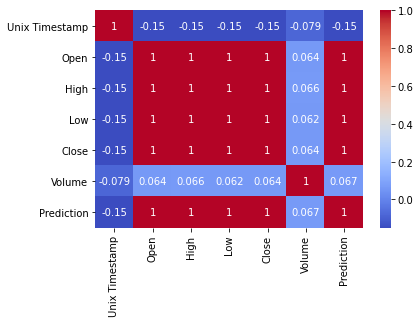

In [22]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [23]:
#create a independent dataset(x)
x = np.array(df[['Close']])
x = x[:-projection]
print(x)
# removing the last 14 row data of close column data 

[[150.39]
 [152.94]
 [155.81]
 ...
 [  9.36]
 [  9.36]
 [  9.36]]


In [24]:
y = df['Prediction'].values 
y = y[:-projection]
print(y)
# removing the last 14 row data of Prediction data


[157.69 159.05 158.77 ...   9.99  10.     9.55]


# *Splitting and Visualizing Data*

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20)

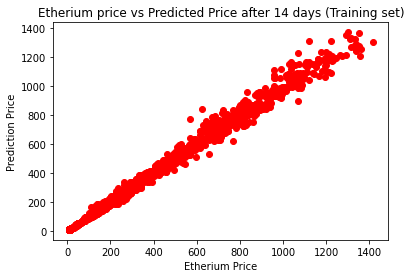

In [26]:
plt.scatter(x_test, y_test, color = "red")
plt.title("Etherium price vs Predicted Price after 14 days (Training set)")
plt.xlabel("Etherium Price")
plt.ylabel("Prediction Price")
plt.show()

# *Model Building & testing*

# *Linear regression*


*   Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.



In [27]:
linReg = LinearRegression()
#train the model
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#testing the model using score
linReg_confidence = linReg.score(x_test, y_test)
print("Linear regression confidence :", linReg_confidence)

Linear regression confidence : 0.9951177219950503


In [29]:
linReg_prediction = linReg.predict(x_test)
print("Linear regression Prediction :", linReg_prediction)

Linear regression Prediction : [467.02047039 266.24241073 161.97595006 ...  15.86118179 136.69530061
 858.9254298 ]


In [30]:
y_test

array([456.45, 272.26, 142.06, ...,  15.94, 135.74, 857.96])

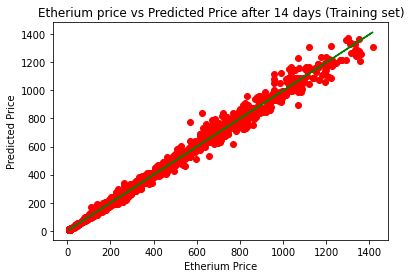

In [31]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, linReg.predict(x_train), color = "green")
plt.title("Etherium price vs Predicted Price after 14 days (Training set)")
plt.xlabel("Etherium Price")
plt.ylabel("Predicted Price")
plt.show()

# Saving Model & Loading Model 

In [32]:
import pickle
#save the model to disk
filename = 'ether_predictor.pkl'
pickle.dump(linReg, open(filename, 'wb'))

In [34]:
#load the model in the disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9951177219950503


In [35]:
loaded_model.predict(x_test)

array([467.02047039, 266.24241073, 161.97595006, ...,  15.86118179,
       136.69530061, 858.9254298 ])

**Thank You!**